<a href="https://colab.research.google.com/github/syedamashs/ML-Implementation/blob/main/titanic_prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/test.csv -O test.csv

--2025-09-05 11:03:31--  https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  27.96K  --.-KB/s    in 0.002s  

2025-09-05 11:03:31 (16.5 MB/s) - ‘test.csv’ saved [28629/28629]



In [5]:
!wget https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/train.csv -O train.csv

--2025-09-05 11:03:32--  https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2025-09-05 11:03:32 (7.60 MB/s) - ‘train.csv’ saved [61194/61194]



In [6]:
!wget https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/gender_submission.csv -O gender_submission.csv

--2025-09-05 11:03:34--  https://raw.githubusercontent.com/Esai-Keshav/titanic-survival-prediction/refs/heads/main/data/gender_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3258 (3.2K) [text/plain]
Saving to: ‘gender_submission.csv’

gender_submission.c 100%[===================>]   3.18K  --.-KB/s    in 0s      

2025-09-05 11:03:34 (51.5 MB/s) - ‘gender_submission.csv’ saved [3258/3258]



In [7]:
!pwd

/content


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv");

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], inplace=True)


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [16]:
print(df.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [17]:
df['Age'] = df['Age'].astype(int)

In [18]:
print(df.dtypes)


Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [19]:
df['Fare']

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [21]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,False,True
1,1,1,1,38,1,0,71.2833,False,False
2,1,3,1,26,0,0,7.9250,False,True
3,1,1,1,35,1,0,53.1000,False,True
4,0,3,0,35,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,False,True
887,1,1,1,19,0,0,30.0000,False,True
888,0,3,1,29,1,2,23.4500,False,True
889,1,1,0,26,0,0,30.0000,False,False


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



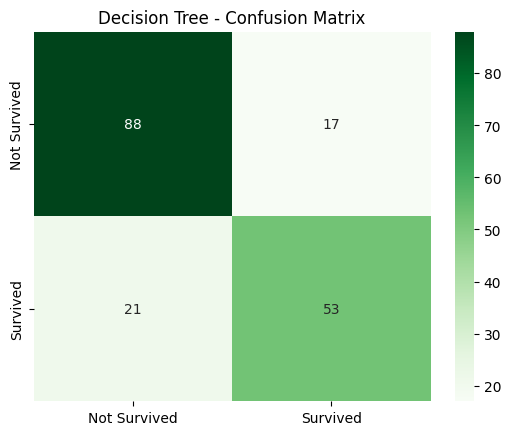

In [29]:
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived','Survived'],
            yticklabels=['Not Survived','Survived'])
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [30]:
svm_model = SVC(kernel='linear')  # you can try 'rbf' also
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



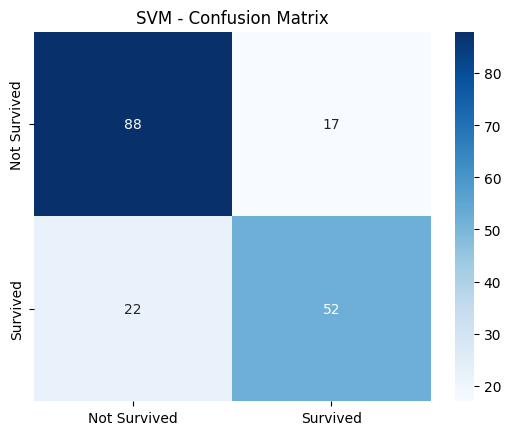

In [31]:
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived','Survived'],
            yticklabels=['Not Survived','Survived'])
plt.title("SVM - Confusion Matrix")
plt.show()
